autoencoder

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D,Conv2DTranspose,MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Model
from sklearn.manifold import TSNE
from tensorflow.keras.utils import to_categorical
import cv2
from keras.preprocessing import image
import random


In [2]:
def reaimg(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (200,200))
    
    return img

In [3]:
def load(dir,lab):
    dic={"img":[],"lable":[]}
    for file in os.listdir(dir):
        if file.endswith(".png") or file.endswith(".jpg"):
            
            path=os.path.join(dir, file)

            img=reaimg(path)
            imgnp=np.array(img)
            # imgnp=np.reshape(imgnp,(40000,3))

            dic["img"].append(imgnp)
            dic["lable"].append(lab)
    df=pd.DataFrame(dic)     

    return df


Bishop=load(r"C:\Users\Anirudh\Downloads\archive\Chess\Bishop",1)
King=load(r"C:\Users\Anirudh\Downloads\archive\Chess\King",2)
Knight=load(r"C:\Users\Anirudh\Downloads\archive\Chess\Knight",3)
Pawn=load(r"C:\Users\Anirudh\Downloads\archive\Chess\Pawn",4)
Queen=load(r"C:\Users\Anirudh\Downloads\archive\Chess\Queen",5)
Rook=load(r"C:\Users\Anirudh\Downloads\archive\Chess\Rook",6)




In [4]:
data = pd.concat([Bishop,King,Knight,Queen,Pawn,Rook], axis=0,ignore_index=True)
data.img=data.img/255


In [24]:
randdata=data.sample(frac=1,random_state=23)
randdata=randdata.reset_index(drop=True)

datatrain=np.array(randdata.img[:420].tolist())
datatest=np.array(randdata.img[420:].tolist())
ytest=np.array(randdata.lable[420:].tolist())
ytrainoh=to_categorical(randdata.lable[:420])

# data=np.array(data)


# data.shape

# datatrain=data[:420]
# datatest=data[420:]
datatrain.shape
print(ytrainoh[0])



[0. 0. 0. 0. 1. 0. 0.]


In [10]:
def showimg(a,n=10,title=''):
    plt.figure(figsize=(20,5))
    for i in range(n):
        s=plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(a[i]))
        s.get_yaxis().set_visible(False)
        s.get_yaxis().set_visible(False)
    plt.suptitle(title,fontsize=10)

def showencimg(a,n=10,title='',h=25,w=25):
    plt.figure(figsize=(20,5))
    for i in range(n):
        s=plt.subplot(2,n,i+1)
        plt.imshow(a[i].reshape(h,w))
        s.get_yaxis().set_visible(False)
        s.get_yaxis().set_visible(False)
    plt.suptitle(title,fontsize=10)
    

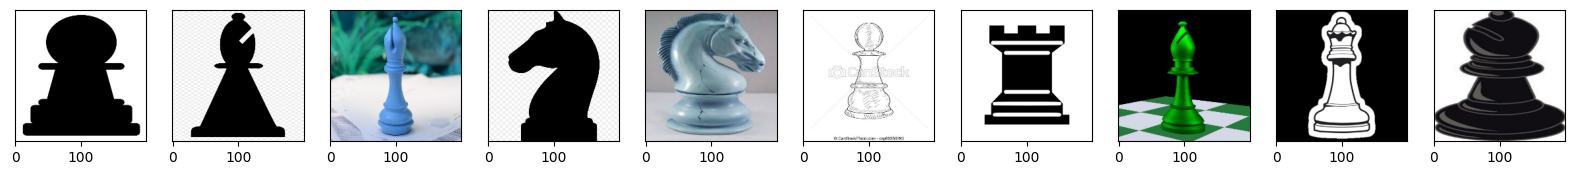

In [11]:
showimg(datatrain)

In [12]:
inputlayer=Input(shape=(200,200,3))
layer=Conv2D(40,(3,3),activation='relu',padding='same')(inputlayer)
layer=MaxPooling2D((2,2))(layer)
layer=Conv2D(16,(3,3),activation='relu',padding='same')(layer)
layer=MaxPooling2D((2,2))(layer)
layer=Conv2D(8,(3,3),activation='relu',padding='same')(layer)
codelayer=MaxPooling2D((2,2),name='code')(layer)
layer=Conv2DTranspose(8,(3,3),activation='relu',padding='same')(codelayer)
layer=UpSampling2D((2,2))(layer)
layer=Conv2DTranspose(16,(3,3),activation='relu',padding='same')(layer)
layer=UpSampling2D((2,2))(layer)
layer=Conv2DTranspose(40,(3,3),activation='relu',padding='same')(layer)
layer=UpSampling2D((2,2))(layer)
outputlayer=Conv2D(3,(3,3),activation='relu',padding='same')(layer)

In [13]:
chessae=Model(inputlayer,outputlayer)
chessae.compile(optimizer="adam",loss='mse')
chessae.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 40)      1120      
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 40)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      5776      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 8)         1160 

In [14]:
chessae.fit(datatrain,datatrain,epochs=30,batch_size=12,shuffle=True,
            validation_data=(datatest,datatest))

Epoch 1/30

35/35 [==============================] - 11s 277ms/step - loss: 0.1172 - val_loss: 0.0403
Epoch 2/30
35/35 [==============================] - 8s 234ms/step - loss: 0.0282 - val_loss: 0.0252
Epoch 3/30
35/35 [==============================] - 8s 230ms/step - loss: 0.0185 - val_loss: 0.0193
Epoch 4/30
35/35 [==============================] - 8s 238ms/step - loss: 0.0148 - val_loss: 0.0170
Epoch 5/30
35/35 [==============================] - 9s 250ms/step - loss: 0.0131 - val_loss: 0.0154
Epoch 6/30
35/35 [==============================] - 9s 267ms/step - loss: 0.0120 - val_loss: 0.0140
Epoch 7/30
35/35 [==============================] - 9s 256ms/step - loss: 0.0112 - val_loss: 0.0130
Epoch 8/30
35/35 [==============================] - 9s 264ms/step - loss: 0.0106 - val_loss: 0.0124
Epoch 9/30
35/35 [==============================] - 8s 233ms/step - loss: 0.0102 - val_loss: 0.0122
Epoch 10/30
35/35 [==============================] - 8s 240ms/step - loss: 0.0101 - val_loss: 0.01

In [15]:
chessae.save('model2.h5')

c:\Users\Anirudh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
encodedchess=Model(inputs=chessae.input, outputs=chessae.get_layer('code').output)
encchs=encodedchess.predict(datatest)
# encchs.shape
encchs=encchs.reshape(len(datatest),25*25*8)
# encchs.shape

4/4 [==============================] - 0s 63ms/step


In [17]:
reconchs=chessae.predict(datatest)

4/4 [==============================] - 1s 142ms/step


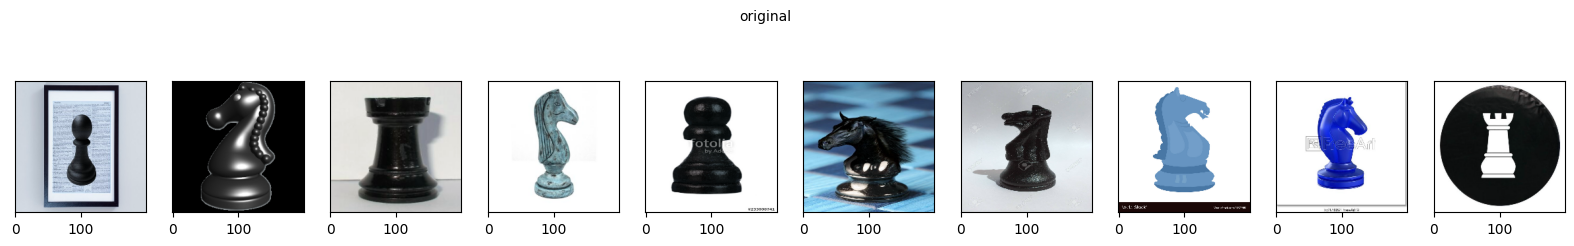

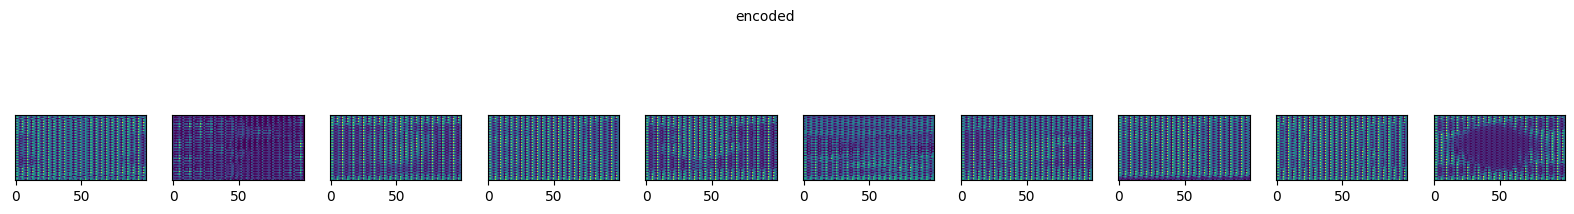

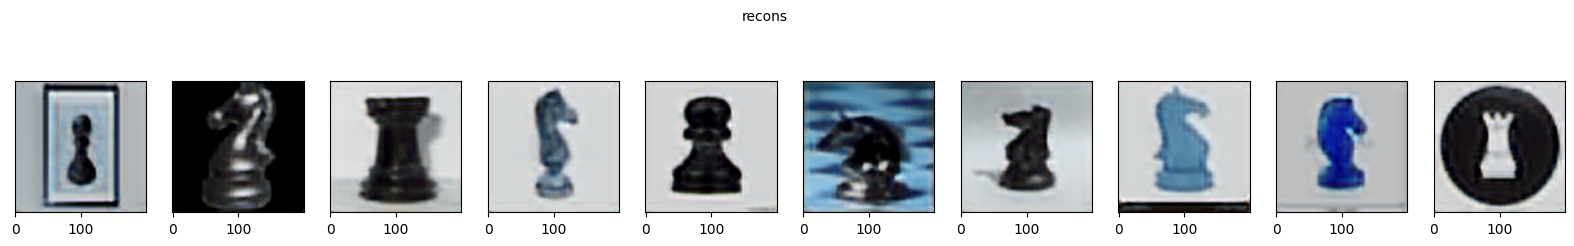

In [18]:
showimg(datatest,title='original')
showencimg(encchs,title='encoded',h=50,w=100)
showimg(reconchs,title='recons')

In [63]:
tsne = TSNE(n_components=2, random_state=23)
encoded_imgs_2D = tsne.fit_transform(encchs2)

17/17 [==============================] - 1s 72ms/step


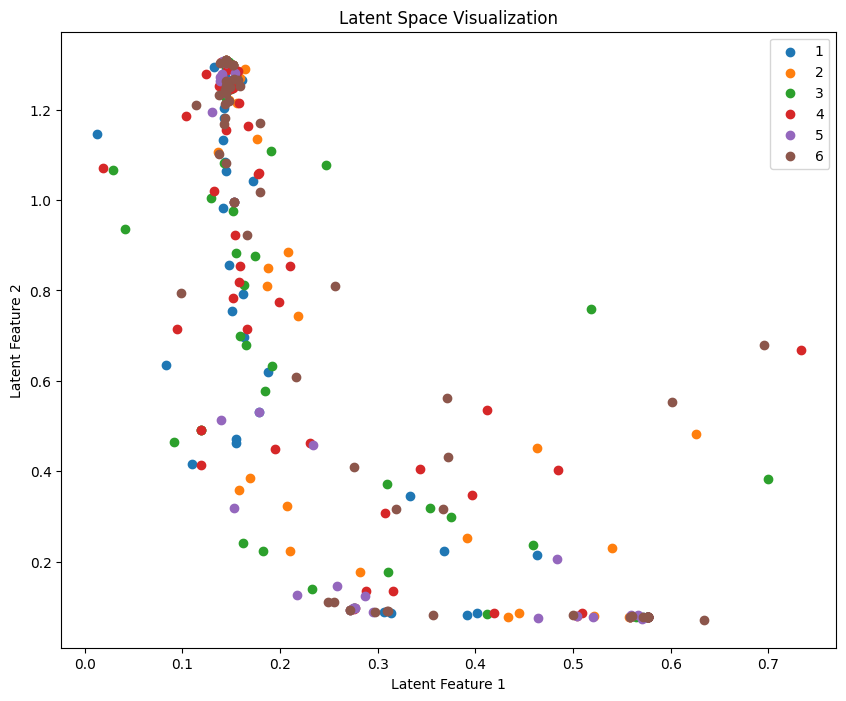

In [29]:
encchs2=encodedchess.predict(np.array(randdata.img.tolist()))
encchs2=encchs2.reshape(len(randdata),25*25*8)
yall=np.array(randdata.lable.tolist())


plt.figure(figsize=(10, 8))

for i in range(1,7):  
    indices = np.where(yall == i)[0]
    plt.scatter(encchs2[indices, 0], encchs2[indices, 1], label=str(i))

plt.title('Latent Space Visualization')
plt.xlabel('Latent Feature 1')
plt.ylabel('Latent Feature 2')
plt.legend()
plt.show()